# Credit Card Default Analysis

Objective: Generate a model that can accurately predict based on select variable who will default on their credit cards.

Data: 
- ID: Unique numberical value used to identify unique variable
- LIMIT_BAL: Amount of given credit
- FICO: Credit card score
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4= other, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=other)
- AGE: Age in years
- SEX: Male or Female
- PAY_1: Repayment status in March, 2019 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in February, 2019 (scale same as above)
- PAY_3: Repayment status in January, 2019 (scale same as above)
- BILL_AMT4: Amount of bill statement in December, 2018 (INR)
- BILL_AMT5: Amount of bill statement in November, 2018 (INR)
- BILL_AMT6: Amount of bill statement in October, 2018 (INR)
- PAY_AMT4: Amount of previous payment in December, 2018 (INR)
- PAY_AMT5: Amount of previous payment in November, 2018 (INR)
- PAY_AMT6: Amount of previous payment in October, 2018 (INR)
- default: Default payment in next month (1=yes, 0=no)



In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metric

import warnings
warnings.filterwarnings("ignore")

In [88]:
# Import Code

db=pd.read_csv("CreditCardDefault.csv")

# Visualise Data

db.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay%1,Pay%2,Pay%3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


In [89]:
db.columns = db.columns.str.replace('%', '_')

In [90]:
# Validate number of Rows and Columns

print('The row count is (observations)', db.shape[0],'\n' 'The column count is (variables)', db.shape[1])

The row count is (observations) 4246 
The column count is (variables) 17


In [91]:
# Check the data types of all variables
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   int64  
 3   EDUCATION  4246 non-null   int64  
 4   MARRIAGE   4246 non-null   int64  
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay_1      4246 non-null   float64
 13  Pay_2      4246 non-null   float64
 14  Pay_3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(9), object(1)
memory usage: 564.0+ KB


In [92]:
# Check for duplicated values

db.duplicated().sum()

0

In [93]:
#Check for null values

db.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Pay_1        0
Pay_2        0
Pay_3        0
default      0
FICO         0
dtype: int64

#### Commentary:

1. There are no Null values and no duplicated values,

2. There are 4246 rows and 17 Columns, of which 7 are floats, 1 is object and the 9 are integer values.
    - Looking at the actual columns Gender, Education, and Marriage need to be converted to object datatypes as they are character values.

In [94]:
# Convert to Object Dtype

db['SEX']= db['SEX'].astype('object')
db['EDUCATION'] = db['EDUCATION'].astype('object')
db['MARRIAGE'] = db['MARRIAGE'].astype('object')

In [95]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   object 
 3   EDUCATION  4246 non-null   object 
 4   MARRIAGE   4246 non-null   object 
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay_1      4246 non-null   float64
 13  Pay_2      4246 non-null   float64
 14  Pay_3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(6), object(4)
memory usage: 564.0+ KB


In [96]:
# Check basic measures of descriptive statistics for continuous variables

db.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default
count,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,15067.475742,157117.286858,35.047574,57061.098917,53771.845973,51647.689590,5616.298398,5193.867640,5717.024494,0.566373,0.549659,0.681941,0.227037
std,8527.469399,130528.792785,9.110943,68727.390542,64368.227196,62985.909815,14647.382789,14114.021638,16549.440680,3.454705,3.953106,4.462142,0.418966
min,4.000000,10000.000000,21.000000,511.000000,511.000000,511.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7790.000000,50000.000000,28.000000,13726.500000,12985.000000,11514.750000,1111.000000,1111.000000,911.000000,0.030000,0.040000,0.030000,0.000000
50%,15158.000000,120000.000000,33.000000,31130.500000,28922.500000,28138.000000,2136.000000,2111.000000,2111.000000,0.040000,0.050000,0.040000,0.000000
75%,22293.750000,230000.000000,41.000000,74406.750000,71826.500000,68806.500000,5111.000000,5111.000000,5111.000000,0.120000,0.140000,0.140000,0.000000
max,30000.000000,1000000.000000,73.000000,891586.000000,927171.000000,961664.000000,321118.000000,417991.000000,261111.000000,106.560000,129.650000,153.330000,1.000000


In [97]:
db['SEX'].value_counts()

2    2530
1    1716
Name: SEX, dtype: int64

In [98]:
db['EDUCATION'].value_counts()

2    2109
1    1416
3     721
Name: EDUCATION, dtype: int64

In [99]:
db['MARRIAGE'].value_counts()

2    2324
1    1861
3      58
0       3
Name: MARRIAGE, dtype: int64

In [100]:
db['MARRIAGE'] = np.where(db['MARRIAGE'] == 1,1,0)

In [101]:
db['MARRIAGE'].value_counts()

0    2385
1    1861
Name: MARRIAGE, dtype: int64

In [102]:
db['default'].value_counts()

0    3282
1     964
Name: default, dtype: int64

In [103]:
# Check the proportion of defaults 

db.default.sum() / len(db.default)

0.22703721149317005

In [104]:
db.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,0,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,0,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,0,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


In [105]:
# drop redundant variable i.e. columns

db = db.drop(['ID', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ], axis = 1)

In [106]:
db.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,FICO
0,50000.0,2,2,1,37,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,0.10,0.08,36.27,0,MT700


In [107]:
# Create dummy variables

db_dummy =pd.get_dummies(db, drop_first=True)
db_dummy.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700
0,50000.0,1,37,0.04,0.04,0.04,0,1,1,0,1
1,250000.0,0,29,0.05,0.05,0.06,0,0,0,0,1
2,20000.0,0,24,0.00,0.09,0.00,1,0,0,0,0
3,320000.0,1,49,0.30,33.40,0.26,0,0,0,0,1
4,130000.0,0,39,0.10,0.08,36.27,0,1,0,1,1


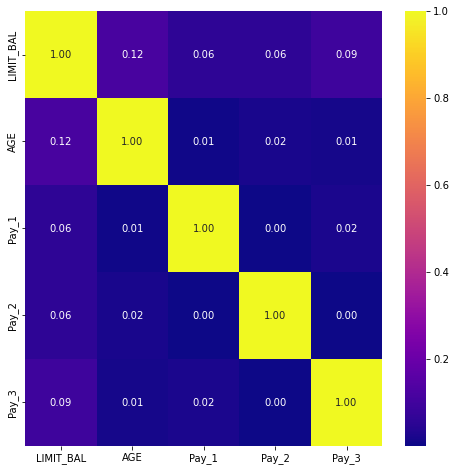

In [109]:
plt.subplots(figsize = (8,8))
sns.heatmap(db_dummy[['LIMIT_BAL', 'AGE', 'Pay_1','Pay_2', 'Pay_3']] .corr(), annot = True, cmap = 'plasma', fmt = '.2f');

## Building model

In [110]:
# Import Statsmodle modules to build logistic regression model

import statsmodels.formula.api as sm

In [111]:
# Create train and test datasets

X = db_dummy.drop(['default'], axis=1)
y = db_dummy['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142,stratify=db_dummy['default'])

# statsmodel requires the labelled data, therefore, concatinating the y lable to the train set.

db_train = pd.concat([X_train,y_train], axis=1)
db_test = pd.concat([X_test,y_test], axis=1)

In [112]:
#Descriptive statistics of Target Variable

db_train['default'].value_counts()

0    2625
1     771
Name: default, dtype: int64

In [113]:
# Check for balance of dataset

db_train.default.sum() / len(db_train.default)

0.22703180212014135

### Feature Selection

The best approach is to perform extensive EDA on the dataset to understand properties of the predictors, however it's not always the best method. For this model I am using feature selection to tune down the number of predictor variables used by the model to make a simpler model to train and to understand and in turn easier to run and less time consuming.

### First Model

In [114]:
db_train.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700,default
275,80000.0,1,30,0.12,0.04,0.06,1,1,0,1,0
294,50000.0,0,58,0.04,0.17,0.04,0,1,0,0,1
1226,320000.0,1,53,0.03,0.03,0.03,1,1,0,1,0
1656,50000.0,1,55,0.00,0.04,0.04,1,0,1,1,0
1051,120000.0,0,44,0.04,0.01,1.80,0,0,1,0,1


In [115]:
# Create the first model using all variables

model_1 = sm.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_1 + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data = db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156125
         Iterations 10


In [116]:
# Check the coefficient

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3385
Method:                           MLE   Df Model:                           10
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7085
Time:                        09:56:45   Log-Likelihood:                -530.20
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2665      0.355      3.572      0.000       0.572       1.961
LIMIT_BAL   -1.801e-06   7.13e-07     -2.526      0.012    -3.2e-06   -4.03e-07
AGE             0.0039      0.009      0.411      0.681      -0.015       0.022
Pay_1           0.0009      0.020      0.045      0.964      -0.038       0.039
Pay_2           0.0380      0.017      2.254      0.024       0.005       0.071
Pay_3          -0.0743      0.025     -2.964      0.003      -0.123      -0.025
SEX_2          -0.2775      0.160     -1.736      0.083      -0.591       0.036
EDUCATION_2     0.2892      0.184      1.571      0.116      -0.072       0.650
EDUCATION_3     0.1400      0.245      0.571      0.568      -0.341       0.621
MARRIAGE        0.2802      0.180      1.557      0.120      -0.073       0.633
FICO_MT700     -7.7487      0.529    -14.641      0.000      -8.786      -6.711
===============================================================================
"""

The highest p-value belongs to the variable Pay_1, the p-value is the level of marginal significance within a statistical hypothesis test. Those with a value of 0.05 or lower is trumpeted as significant, but if it is higher than 0.05, the result is non-significant.

In this case the p-value is 0.963, thus is insignificant, therefore it can be eliminated.

### Second Model 

In [117]:
#Create second model excluding Pay_1 variable

model_2 = sm.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data=db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156125
         Iterations 10


In [118]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3386
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7085
Time:                        10:11:28   Log-Likelihood:                -530.20
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2669      0.354      3.575      0.000       0.572       1.962
LIMIT_BAL   -1.799e-06   7.12e-07     -2.527      0.011   -3.19e-06   -4.04e-07
AGE             0.0038      0.009      0.410      0.682      -0.015       0.022
Pay_2           0.0380      0.017      2.253      0.024       0.005       0.071
Pay_3          -0.0743      0.025     -2.964      0.003      -0.123      -0.025
SEX_2          -0.2771      0.160     -1.736      0.083      -0.590       0.036
EDUCATION_2     0.2886      0.184      1.572      0.116      -0.071       0.649
EDUCATION_3     0.1394      0.245      0.569      0.569      -0.341       0.619
MARRIAGE        0.2806      0.180      1.560      0.119      -0.072       0.633
FICO_MT700     -7.7487      0.529    -14.641      0.000      -8.786      -6.711
===============================================================================
"""

AGE has the highest p-value, therefore, it can be eliminated as well


### Third Model

In [119]:
# Build third model excluding Pay_1 and AGE

model_3 = sm.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE+ FICO_MT700', data = db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156150
         Iterations 10


In [120]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3387
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7085
Time:                        10:18:03   Log-Likelihood:                -530.29
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3842      0.210      6.587      0.000       0.972       1.796
LIMIT_BAL   -1.753e-06   7.02e-07     -2.495      0.013   -3.13e-06   -3.76e-07
Pay_2           0.0384      0.017      2.281      0.023       0.005       0.071
Pay_3          -0.0744      0.025     -2.972      0.003      -0.123      -0.025
SEX_2          -0.2833      0.159     -1.783      0.075      -0.595       0.028
EDUCATION_2     0.2849      0.183      1.554      0.120      -0.074       0.644
EDUCATION_3     0.1537      0.242      0.634      0.526      -0.322       0.629
MARRIAGE        0.3124      0.162      1.924      0.054      -0.006       0.631
FICO_MT700     -7.7484      0.529    -14.636      0.000      -8.786      -6.711
===============================================================================
"""

EDUCATION_3 has the highest p-value above the 0.05 threshold, therefor it will be removed from the next training model.

### Forth Model

In [122]:
#  Build the forth model excluding Pay_1, AGE, and EDUCATION_3

model_4 = sm.logit(formula = ' default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + MARRIAGE + FICO_MT700', data = db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156210
         Iterations 10


In [123]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            7
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7084
Time:                        10:23:05   Log-Likelihood:                -530.49
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4486      0.185      7.835      0.000       1.086       1.811
LIMIT_BAL   -1.871e-06   6.76e-07     -2.767      0.006    -3.2e-06   -5.46e-07
Pay_2           0.0383      0.017      2.264      0.024       0.005       0.071
Pay_3          -0.0744      0.025     -2.967      0.003      -0.124      -0.025
SEX_2          -0.2835      0.159     -1.785      0.074      -0.595       0.028
EDUCATION_2     0.2244      0.157      1.426      0.154      -0.084       0.533
MARRIAGE        0.3343      0.159      2.107      0.035       0.023       0.645
FICO_MT700     -7.7439      0.529    -14.636      0.000      -8.781      -6.707
===============================================================================
"""

The largest p-value belongs to EDUCATION_2; It will be removed from the next model.

In [124]:
# Model 5 without Pay_1, AGE, EDUCATION_3 & EDUCATION_2

model_5 = sm.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + MARRIAGE + FICO_MT700', data = db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156509
         Iterations 10


In [125]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3389
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7078
Time:                        10:29:24   Log-Likelihood:                -531.50
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5765      0.163      9.672      0.000       1.257       1.896
LIMIT_BAL  -2.033e-06   6.66e-07     -3.051      0.002   -3.34e-06   -7.27e-07
Pay_2          0.0388      0.017      2.277      0.023       0.005       0.072
Pay_3         -0.0727      0.025     -2.923      0.003      -0.121      -0.024
SEX_2         -0.2801      0.159     -1.765      0.077      -0.591       0.031
MARRIAGE       0.3478      0.158      2.198      0.028       0.038       0.658
FICO_MT700    -7.7406      0.529    -14.637      0.000      -8.777      -6.704
==============================================================================
"""

 Eliminate SEX_2 from the model
 
 
 ###  Sixth Model

In [128]:
# Build the sixth model without the previous values and SEX_2

model_6 = sm.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + MARRIAGE + FICO_MT700', data = db_train).fit()

Optimization terminated successfully.
         Current function value: 0.156973
         Iterations 10


In [129]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3390
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.7070
Time:                        10:35:35   Log-Likelihood:                -533.08
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4068      0.129     10.939      0.000       1.155       1.659
LIMIT_BAL  -2.017e-06   6.64e-07     -3.038      0.002   -3.32e-06   -7.15e-07
Pay_2          0.0378      0.017      2.228      0.026       0.005       0.071
Pay_3         -0.0731      0.025     -2.938      0.003      -0.122      -0.024
MARRIAGE       0.3546      0.158      2.243      0.025       0.045       0.664
FICO_MT700    -7.7367      0.529    -14.628      0.000      -8.773      -6.700
==============================================================================
"""

All variable p-values are below 0.05, therefore all are significant.

In [131]:
# Predicted probability values of the Data

y_prob_pred_train = model_6.predict(db_train)
y_prob_pred_train

275     0.002151
294     0.787433
1226    0.001330
1656    0.002289
1051    0.737637
          ...   
2579    0.792891
459     0.002216
1001    0.002070
3240    0.723205
850     0.768926
Length: 3396, dtype: float64

In [132]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

## Evaluate the model on the Training Data

Check the confusion matrix and the calssification report followed by the AUC and the AUC-ROC curve.

In [133]:
#Import model metrics from sklearn

from sklearn import metrics

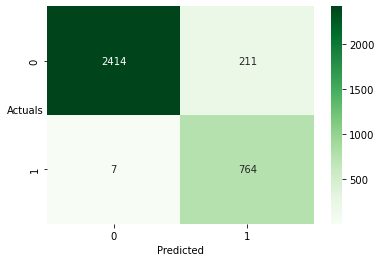

In [135]:
sns.heatmap((metrics.confusion_matrix(db_train['default'],y_class_pred)),annot=True, fmt='.5g',cmap='Greens');
plt.xlabel('Predicted')
plt.ylabel('Actuals',rotation=0);

In [136]:
print(metrics.classification_report(db_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.997     0.920     0.957      2625
           1      0.784     0.991     0.875       771

    accuracy                          0.936      3396
   macro avg      0.890     0.955     0.916      3396
weighted avg      0.949     0.936     0.938      3396



There was a 94% of correct predictions to the total predictions made by the model

99% of those defaulted are correctly identified by the model

## Evaluate the model on the Testing Data

In [137]:
y_prob_pred_test = model_6.predict(db_test)
y_prob_pred_test

381     0.002443
9       0.787098
3819    0.826387
661     0.001166
1205    0.001511
          ...   
3543    0.727354
3980    0.001542
1782    0.002155
2042    0.784404
3597    0.001029
Length: 850, dtype: float64

In [139]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

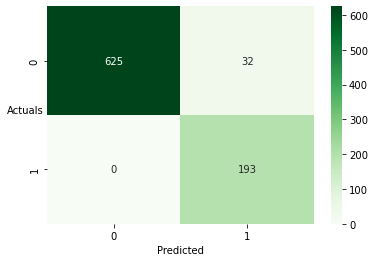

In [140]:
sns.heatmap((metrics.confusion_matrix(db_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [144]:
print(metrics.classification_report(db_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.951     0.975       657
           1      0.858     1.000     0.923       193

    accuracy                          0.962       850
   macro avg      0.929     0.976     0.949       850
weighted avg      0.968     0.962     0.963       850



A 96% margin of correct predictions made by the model of which 100% correct identification on who defaulted by the model. 